<a href="https://colab.research.google.com/github/PauForestal/master_bdds/blob/main/M2_AI2_VallejoPaula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## **PRELIMINAR: LECTURA Y REVISIÓN DE DATAFRAME**

---

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/PauForestal/master_bdds/main/Modulo2/datos_facturas.csv', sep=";", decimal = ',')

In [57]:
#df.sort_values('total_pagado', ascending=True)
df.sample(10)

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
17,18,18/01/2010,Enero,clienteA,si,150,normal,18,27.0,177.0
18,19,19/01/2010,Enero,clienteB,si,75,normal,18,13.5,88.5
41,42,11/02/2010,Febrero,clienteA,no,125,reducido,8,10.0,135.0
3,4,04/01/2010,Enero,clienteD,si,200,normal,18,36.0,236.0
22,23,23/01/2010,Enero,clienteB,no,150,normal,18,27.0,177.0
27,28,28/01/2010,Enero,clienteC,si,175,reducido,8,14.0,189.0
32,33,02/02/2010,Febrero,clienteD,si,75,normal,18,13.5,88.5
37,38,07/02/2010,Febrero,clienteA,si,100,normal,18,18.0,118.0
10,11,11/01/2010,Enero,clienteC,no,150,normal,18,27.0,177.0
38,39,08/02/2010,Febrero,clienteA,si,150,normal,18,27.0,177.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               45 non-null     int64  
 1   fecha            45 non-null     object 
 2   mes              45 non-null     object 
 3   cliente          45 non-null     object 
 4   factura_pagada   45 non-null     object 
 5   importe_factura  45 non-null     int64  
 6   tipo_IVA         45 non-null     object 
 7   porcentaje_IVA   45 non-null     int64  
 8   IVA              45 non-null     float64
 9   total_pagado     45 non-null     float64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.6+ KB


In [6]:
df.describe(include=[np.number])

,id,importe_factura,porcentaje_IVA,IVA,total_pagado
count,45.000000,45.000000,45.000000,45.000000,45.000000
mean,23.000000,126.777778,16.000000,20.531111,147.308889
std,13.133926,49.026379,4.045199,10.026461,57.936116
min,1.000000,25.000000,8.000000,2.400000,29.500000
25%,12.000000,100.000000,18.000000,13.500000,108.000000
50%,23.000000,125.000000,18.000000,18.000000,135.000000
75%,34.000000,175.000000,18.000000,27.000000,189.000000
max,45.000000,200.000000,18.000000,36.000000,236.000000


In [12]:
df.total_pagado.sum()

6628.9

In [11]:
df.groupby(['factura_pagada']).agg({'total_pagado': 'sum'})

,total_pagado
factura_pagada,
no,2052.4
si,4576.5


In [21]:
df.groupby(['mes']).agg({'total_pagado': 'sum'})

,total_pagado
mes,
Enero,4790.0
Febrero,1838.9


In [23]:
df.groupby(['tipo_IVA']).agg({'total_pagado': 'sum'})

,total_pagado
tipo_IVA,
normal,5516.5
reducido,1112.4


In [20]:
print('No pagado:',"{:.2%}".format(2052.4/6628.9),'- Pagado:',"{:.2%}".format(4576.5/6628.9))

No pagado: 30.96% - Pagado: 69.04%


El dataframe cuenta con una dimensión de 9 columnas y 45 filas y entrega información respecto a los distintos clientes, facturas (pagadas o no) e IVA aplicado a cada una de ellas.

En términos generales, hay un 31% de facturas no pagadas y un 69% de facturas pagadas. Este análisis se está realizando en los meses de enero y febrero.

En relación al tipo de variables, se concluye lo siguiente respecto de las 9 presentes en este DataFrame:
- ***ID:*** Es una variable cuantitativa discreta (es finita y en función de la cantidad de facturas ingresadas al df). Es un identificador correlativo y secuencial del número de registros de facturas.
- ***Fecha:*** Variable Cuantitativa Continua. Es la fecha en que se generó la factura
- ***Mes:*** Variable Categórica ordinal, indica el nombre del mes en el que se generó la factura.
- ***Cliente:*** Variable Categórica Nominal. Indica el tipo de cliente.
- ***Factura Pagada:*** Variable Categórica Binaria (toma sólo 2 valores, sí o no). Indica si la factura está pagada o no en la fecha de generación.
- ***Importe factura:*** Esta es una variable Cuantitativa Continua (tiene relación con un monto de factura que puede tomar cualquier valor). Esta variable indica el importe neto sin el IVA aplicado.
- ***Tipo de IVA:*** Esta variable indica el tipo de Impuesto aplicado a la factura y es una variable Categórica Ordinal puesto que, además de ser descriptiva, se puede ordenar y entender si el IVA aplicado es menor o mayor. 
- ***Porcentaje de IVA:*** Variable Cuantitativa Discreta ya que toma los valores que se han definido por ley. Esta variable indica el porcentaje a gravar en la factura.
- ***IVA:*** Es una variable Cuantitativa Continua ya que es la multiplicación de dos variables numéricas, una continua y otra discreta. Su resultado es una Variable Cuantitativa Continua. Indica el monto de IVA a pagar en la factura.
- ***Total pagado:***Variable Cuantitativa Continua. Indica el monto bruto de la factura (esto es el neto más el importe IVA).

## **1. MEDIDAS DE CENTRALIZACIÓN**

---



In [25]:
#Función que permite calcular las medidas de tendencia central, según la columna que se le pase.
def central_tendency(col):
    mean = f'MEAN: {round(df[col].mean(),2)}'
    median = f'MEDIAN: {df[col].median()}'
    mode = f'MODE: {df[col].mode().to_list()}'
    print(f'Las medidas de tendencia central para la variable "{col}" son:\n\n{mean}\n{median}\n{mode}\n')

In [26]:
#Iteración para identificar las columnas numéricas y excluir el id. Las columnas resultantes entran a la función anteriormente descrita, para tener una visión general de ellas.
for col, types in df.dtypes.items():
    if col != 'id' and types != 'object':
        central_tendency(col)    

Las medidas de tendencia central para la variable "importe_factura" son:

MEAN: 126.78
MEDIAN: 125.0
MODE: [100]

Las medidas de tendencia central para la variable "porcentaje_IVA" son:

MEAN: 16.0
MEDIAN: 18.0
MODE: [18]

Las medidas de tendencia central para la variable "IVA" son:

MEAN: 20.53
MEDIAN: 18.0
MODE: [18.0, 36.0]

Las medidas de tendencia central para la variable "total_pagado" son:

MEAN: 147.31
MEDIAN: 135.0
MODE: [118.0, 236.0]



In [8]:
central_tendency('total_pagado')

Las medidas de tendencia central para la variable "total_pagado" son:

MEAN: 147.31
MEDIAN: 135.0
MODE: [118.0, 236.0]



Las medidas de centralización para la variable "Total Pagado" son las siguientes:

- Media: 147.31
- Mediana: 135.0
- Moda: [118.0, 236.0]

Esto quiere decir que el promedio del total pagado es de 147.31, el valor que se encuentra en la mitad del intervalo de las facturas pagadas y ordenadas es 135 y la moda es bimodal, presentando dos valores que se repiten en la misma cantidad: 118 y 236.

Como complemento, al analizar las otras variables cuantitativas, es interesante destacar que el porcentaje de IVA que más se aplica es 18%.

## **2. MEDIDAS DE DISPERSION**

---

In [33]:
#Función para determinar las medidas de dispersión. Permite calcularlas según la columna que se quiera analizar.
def dispersion_measure(col):
    range = np.max(df[col]) - np.min(df[col])
    variance = round(np.var(df[col], ddof=1),2)
    standard_deviation = round(np.std(df[col], ddof=1),2)
    cv = '{:.2%}'.format(standard_deviation / np.mean(df[col]))
    print(f'Las medidas de dispersión para la variable "{col}" son:\n\nRANGO: {range}\nVARIANZA: {variance}\nDESVIACIÓN ESTÁNDAR: {standard_deviation}\nCOEFICIENTE DE VARIACIÓN: {cv}\n')

In [34]:
#Iteración para identificar las columnas numéricas y excluir el id. Las columnas resultantes entran a la función anteriormente descrita, para tener una visión general de ellas.
for col, types in df.dtypes.items():
    if col != 'id' and types != 'object':
        dispersion_measure(col)   

Las medidas de dispersión para la variable "importe_factura" son:

RANGO: 175
VARIANZA: 2403.59
DESVIACIÓN ESTÁNDAR: 49.03
COEFICIENTE DE VARIACIÓN: 38.67%

Las medidas de dispersión para la variable "porcentaje_IVA" son:

RANGO: 10
VARIANZA: 16.36
DESVIACIÓN ESTÁNDAR: 4.05
COEFICIENTE DE VARIACIÓN: 25.31%

Las medidas de dispersión para la variable "IVA" son:

RANGO: 33.6
VARIANZA: 100.53
DESVIACIÓN ESTÁNDAR: 10.03
COEFICIENTE DE VARIACIÓN: 48.85%

Las medidas de dispersión para la variable "total_pagado" son:

RANGO: 206.5
VARIANZA: 3356.59
DESVIACIÓN ESTÁNDAR: 57.94
COEFICIENTE DE VARIACIÓN: 39.33%



In [35]:
dispersion_measure('total_pagado')

Las medidas de dispersión para la variable "total_pagado" son:

RANGO: 206.5
VARIANZA: 3356.59
DESVIACIÓN ESTÁNDAR: 57.94
COEFICIENTE DE VARIACIÓN: 39.33%



En relación a las medidas de dispersión, podemos observar que el rango del total pagado de facturas es de 206.5, esta es la diferencia entre el mayor valor y el menor valor de esta variable.

La varianza, permite entender cómo los datos varían respecto de la media. Esta medida se calcula al cuadrado ya que así permite eliminar el error que se podría dar al realizar la suma si las distancias son negativas. 

Dado que esta medida es difícil de analizar y comparar (debido a que está al cuadrado) se calcula la desviación estándar que no es más que la raíz cuadrada de la varianza.

La desviación estándar es de 57.94.

El coeficiente de variación es la desviación estándar dividido por la media y para el caso del total pagado es de 39.33%, esta es la forma más simple de entender la variabilidad de los casos o cuánto se mueven los datos respecto de su media.

## **3. MEDIDAS DE POSICIÓN**

---

In [60]:
#Función para determinar las medidas de posición. Permite calcularlas según la columna que se quiera analizar.
def position_measure(col):
  IQR = ss.iqr(df[col], interpolation='midpoint')
  #Q1 = np.percentile(df[col], 25, interpolation='midpoint')
  Q1 = df[col].quantile(0.25)
  #D3 = np.percentile(df[col], 90, interpolation='midpoint')
  D3 = df[col].quantile(0.3)
  print(f'Las medidas de posición para la variable "{col}" son:\nIQR: {IQR}\nQ1: {Q1}\nD3: {D3}')

In [46]:
#Iteración para identificar las columnas numéricas y excluir el id. Las columnas resultantes entran a la función anteriormente descrita, para tener una visión general de ellas.
for col, types in df.dtypes.items():
    if col != 'id' and types != 'object':
        position_measure(col)

Las medidas de posición para la variable "importe_factura" son:
IQR: 75.0
Q1: 100.0
D3: 100.0
Las medidas de posición para la variable "porcentaje_IVA" son:
IQR: 0.0
Q1: 18.0
D3: 18.0
Las medidas de posición para la variable "IVA" son:
IQR: 13.5
Q1: 13.5
D3: 13.5
Las medidas de posición para la variable "total_pagado" son:
IQR: 81.0
Q1: 108.0
D3: 118.0


In [47]:
position_measure('total_pagado')

Las medidas de posición para la variable "total_pagado" son:
IQR: 81.0
Q1: 108.0
D3: 118.0


En relación a las medidas de posición para la variable "total_pagado", se puede observar que el rango intercuartil es de 81, esto quiere decir que la diferencia entre el tercer cuartil y el primer cuartil es de 81, por lo que el 50% de los datos están entre los valores 108 y 189 del total pagado.

El tercer decil de los datos corresponde a 118.

In [61]:
#Segunda parte de la pregunta 3
D9 = df['total_pagado'].quantile(0.9)
cantidad_facturas = df.query('total_pagado >= @D9').total_pagado.count()
id_factura = df.query('total_pagado >= @D9').id.unique()

print(f'La cantidad de facturas que tienen cómo mínimo el 10% del total pagado son {cantidad_facturas} y su valor es mayor o igual a: {D9}\n')
print(f'Las facturas que tienen como mínimo el 10% del total pagado son las siguientes: {id_factura}')

La cantidad de facturas que tienen cómo mínimo el 10% del total pagado son 8 y su valor es mayor o igual a: 236.0

Las facturas que tienen como mínimo el 10% del total pagado son las siguientes: [ 4  8 13 20 25 29 34 41]


## **4. MEDIDAS DE CONCENTRACIÓN y FORMA (DISTRIBUCIÓN)**

---

In [65]:
#Función para determinar las medidas de distribución. Permite calcularlas según la columna que se quiera analizar.
def distribution_measure(col):
    asimetria = round(df[col].skew(), 3)
    curtosis = round(df[col].kurt(), 3)
    print(f'\n\n\nLas medidas de distribución (o concentración y forma) para la variable "{col}" son:\n\nASIMETRIA: {asimetria},\nCURTOSIS: {curtosis}\n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)





Las medidas de distribución (o concentración y forma) para la variable "total_pagado" son:

ASIMETRIA: 0.096,
CURTOSIS: -0.799



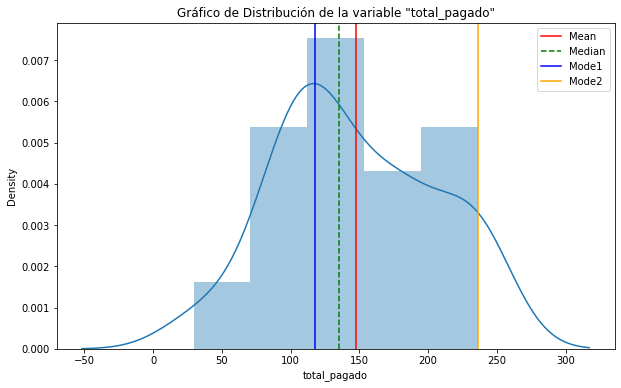

In [66]:
mean=df['total_pagado'].mean()
median=df['total_pagado'].median()
mode=df['total_pagado'].mode()

fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(df['total_pagado']);

plt.title('Gráfico de Distribución de la variable "total_pagado"')
plt.axvline(mean, color='red', label='Mean')
plt.axvline(median, color='green', label='Median', linestyle = '--')
plt.axvline(mode[0], color='blue', label='Mode1')
plt.axvline(mode[1], color='orange', label='Mode2')
plt.legend();

distribution_measure('total_pagado')

En relación a las medidas de concentración y forma, observamos que la asimetría toma un valor positivo por lo que tiene una asimetría positiva (la cola de la distribución se desplaza hacia la derecha, esto quiere decir que la mayoría de los datos se distribuyen a la derecha de la media (Se observa en el gráfico, donde la media es la línea roja y esta a su vez es mayor que la mediana y el primer valor de la moda).

La curtosis toma un valor negativo, esto quiere decir (y tal como se observa en la gráfica) que la distribución de los datos es Platicúrtica, o bien que los datos están dispersos (no concentrados hacia la media).

## **5. ANÁLISIS BOXPLOT Y SUS MEDIDAS**


---

Median: 135.0
Mean: 147.3
Minimum: 29.5
Maximum: 236.0
Q1: 108.0
Q3: 189.0
Lower outliers: []
Upper outliers: []




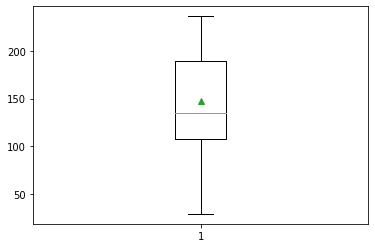

In [17]:
data = df['total_pagado']
bp = plt.boxplot(data, showmeans=True)

medians = [round(item.get_ydata()[0], 1) for item in bp['medians']]
means = [round(item.get_ydata()[0], 1) for item in bp['means']]
minimums = [round(item.get_ydata()[0], 1) for item in bp['caps']][::2]
maximums = [round(item.get_ydata()[0], 1) for item in bp['caps']][1::2]
q1 = [round(min(item.get_ydata()), 1) for item in bp['boxes']]
q3 = [round(max(item.get_ydata()), 1) for item in bp['boxes']]
fliers = [item.get_ydata() for item in bp['fliers']]
lower_outliers = []
upper_outliers = []

for i in range(len(fliers)):
    lower_outliers_by_box = []
    upper_outliers_by_box = []
    for outlier in fliers[i]:
        if outlier < q1[i]:
            lower_outliers_by_box.append(round(outlier, 1))
        else:
            upper_outliers_by_box.append(round(outlier, 1))
    lower_outliers.append(lower_outliers_by_box)
    upper_outliers.append(upper_outliers_by_box)    
    
stats = [medians, means, minimums, maximums, q1, q3, lower_outliers, upper_outliers]
stats_names = ['Median', 'Mean', 'Minimum', 'Maximum', 'Q1', 'Q3', 'Lower outliers', 'Upper outliers']

for j in range(len(stats)):
    print(f'{stats_names[j]}: {stats[j][i]}')

print('\n')

En el gráfico de boxplot se observa la asimetría positiva de los datos del total pagado. Es interesante observar que estos datos no presentan outliers.

## **6. ANÁLISIS DE PAGO DE FACTURAS POR CLIENTE**

---

In [19]:
df.query('factura_pagada == "si"').groupby('cliente')['total_pagado'].sum()

cliente
clienteA    1534.0
clienteB     924.0
clienteC     584.5
clienteD    1534.0
Name: total_pagado, dtype: float64

Aquellos clientes que sí han pagado sus facturas son el cliente A y D, pagando un total ambos de 1.534 UM (unidades monetarias).

## **7. ANÁLISIS DE FACTURAS NO PAGADAS POR CLIENTE, EN EL MES DE FEBRERO**

---

In [20]:
df.query('factura_pagada == "no" and mes == "Febrero"').groupby(['cliente','mes','factura_pagada']).agg({'total_pagado': 'sum', 'factura_pagada': 'count'}).sort_values('total_pagado', ascending=False)

,,,total_pagado,factura_pagada
cliente,mes,factura_pagada,,
clienteC,Febrero,no,285.0,2
clienteA,Febrero,no,135.0,1
clienteB,Febrero,no,59.0,1
clienteD,Febrero,no,32.4,1


Durante el mes de febrero hay cuatro clientes que no han pagado facturas, no obstante el cliente C es el que tiene mayor monto adeudado; 285 es el monto y 2 es la cantidad de facturas no pagadas por este cliente.

## **8. GRAFICO DE DISPERSIÓN ENTRE TOTAL PAGADO DE FACTURAS E IVA APLICADO**

---

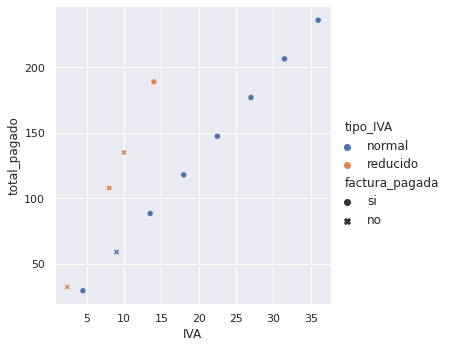

In [22]:
sns.relplot(x='IVA', y='total_pagado', hue='tipo_IVA', style='factura_pagada', data=df);

En el gráfico de dispersión anterior, se puede ver claramente que hay una relación positiva entre el total pagado y el IVA (a medida que aumenta el IVA también aumenta el total pagado), también se puede ver (al agrupar por el tipo de IVA) que es interesante que quienes no han pagado son quienes tienen el menor IVA aplicado)

## **7. COVARIANZA ENTRE TOTAL PAGADO E IVA APLICADO**

---

In [23]:
def cov(a,b):
  cov = round(((df[a] -  df[a].mean()) * (df[b] -  df[b].mean())).sum() / (df.shape[0] - 1),2)
  return cov

In [24]:
cov('IVA','total_pagado')

526.77

In [25]:
df[['total_pagado','IVA']].corr()

,total_pagado,IVA
total_pagado,1.000000,0.906824
IVA,0.906824,1.000000


En relación a la Covarianza entre las variables IVA y Total Pagado, ésta es de 526,77. Adicionalmente se calcula la correlación entre ellas y se puede evidenciar que están fuertemente relacionadas (con un coeficiente de más de 0,9).